In [1]:
import numpy as np
import pandas as pd
from pycaret.regression import *

In [2]:
data = pd.read_csv('./data/1917_full.csv', encoding = 'utf-16')
data.head()

,Year,Month,Stn_Name,Prov,Lat,Long,Tm,S,P
0,1917,1,ALIX,AB,52.383,-113.167,-15.400000,40.200001,42.000000
1,1917,1,ALLIANCE,AB,52.433,-111.783,-17.299999,0.000000,0.000000
2,1917,1,ATHABASCA LANDING,AB,54.717,-113.283,-20.700001,26.400000,26.400000
3,1917,1,BANFF,AB,51.183,-115.567,-11.400000,18.299999,18.299999
4,1917,1,BASHAW,AB,52.683,-112.867,0.000000,22.900000,35.599998


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5979 entries, 0 to 5978
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5979 non-null   int64  
 1   Month     5979 non-null   int64  
 2   Stn_Name  5979 non-null   object 
 3   Prov      5979 non-null   object 
 4   Lat       5967 non-null   float64
 5   Long      5967 non-null   float64
 6   Tm        5979 non-null   float64
 7   S         5979 non-null   float64
 8   P         5979 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 420.5+ KB


In [4]:
data = data.dropna()

In [5]:
data.isna().sum()

Year        0
Month       0
Stn_Name    0
Prov        0
Lat         0
Long        0
Tm          0
S           0
P           0
dtype: int64

In [6]:
s = setup(data, target = 'S', session_id = 42)   #fix_imbalance=True

,Description,Value
0,Session id,42
1,Target,S
2,Target type,Regression
3,Original data shape,"(5967, 9)"
4,Transformed data shape,"(5967, 20)"
5,Transformed train set shape,"(4176, 20)"
6,Transformed test set shape,"(1791, 20)"
7,Numeric features,6
8,Categorical features,2
9,Preprocess,True


In [7]:
s.y_transformed.value_counts()

S
0.000000      3059
5.100000        85
7.600000        71
2.500000        55
12.700000       52
              ... 
92.300003        1
49.900002        1
16.900000        1
27.200001        1
122.900002       1
Name: count, Length: 771, dtype: int64

In [8]:
s.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,5.2407,158.3137,12.3767,0.7883,0.8194,0.5832,2.0250
rf,Random Forest Regressor,5.0685,171.7131,12.8969,0.7700,0.7211,0.6320,0.9360
lightgbm,Light Gradient Boosting Machine,5.4815,175.3559,13.0044,0.7692,0.8253,0.6204,0.1990
et,Extra Trees Regressor,5.1040,171.4574,12.9242,0.7680,0.6994,0.6270,0.6090
gbr,Gradient Boosting Regressor,6.6120,184.8380,13.4265,0.7488,1.0020,0.7768,0.3850
dt,Decision Tree Regressor,6.2090,274.8584,16.3604,0.6335,0.8400,0.8414,0.0700
knn,K Neighbors Regressor,7.6024,376.5181,18.9903,0.5146,1.0672,0.8011,0.0620
ada,AdaBoost Regressor,16.1080,435.3939,20.7422,0.3923,2.1051,1.9854,0.2300
en,Elastic Net,14.5876,548.0247,23.2232,0.2637,1.7962,1.5301,0.0550
llar,Lasso Least Angle Regression,14.6654,552.1551,23.3139,0.2576,1.8017,1.5307,0.0670


In [9]:
rf_mdl = s.create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.0225,233.0865,15.2672,0.7642,0.7522,0.8958
1,4.3296,104.0883,10.2024,0.8417,0.7598,0.5061
2,5.7888,298.6115,17.2804,0.6285,0.8046,0.7347
3,4.8513,123.1349,11.0966,0.7443,0.6794,0.6626
4,4.9494,193.2657,13.9020,0.8446,0.6963,0.7173
5,4.4654,109.7447,10.4759,0.7955,0.6402,0.4729
6,5.9411,198.6965,14.0960,0.7462,0.8528,0.5427
7,4.0862,97.9880,9.8989,0.8231,0.6097,0.5391
8,4.9903,195.6402,13.9871,0.7483,0.6164,0.5105


In [10]:
rf_mdl

RandomForestRegressor(n_jobs=-1, random_state=42)

In [11]:
tuned_rf_mdl = s.tune_model(rf_mdl)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.6744,322.3880,17.9552,0.6738,1.0218,1.0079
1,6.4367,142.8349,11.9514,0.7827,1.1184,0.7128
2,7.1627,336.9150,18.3552,0.5809,1.0185,0.7432
3,6.2445,131.2305,11.4556,0.7275,0.9616,0.7340
4,6.8936,342.3852,18.5037,0.7247,1.0012,0.7929
5,6.3308,139.2242,11.7993,0.7406,0.9967,0.5174
6,7.4497,249.3750,15.7916,0.6815,1.1160,0.6018
7,5.8739,135.6089,11.6451,0.7552,0.9307,0.6899
8,6.6808,219.0007,14.7987,0.7183,0.9320,0.6136


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [12]:
evaluate_model(tuned_rf_mdl)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

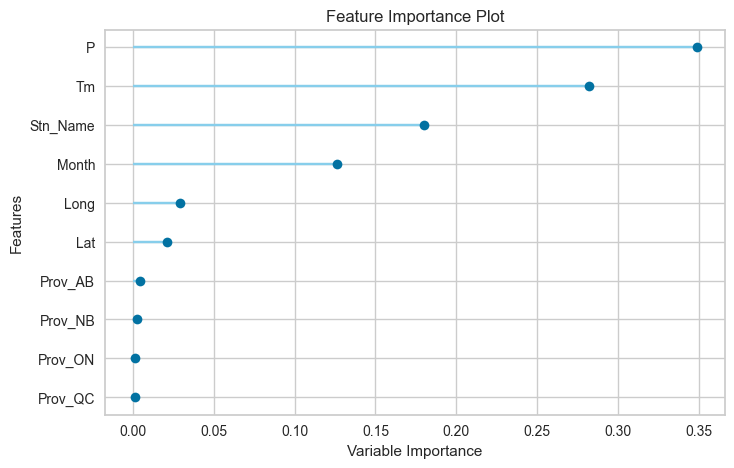

In [14]:
plot_model(tuned_rf_mdl, plot='feature')

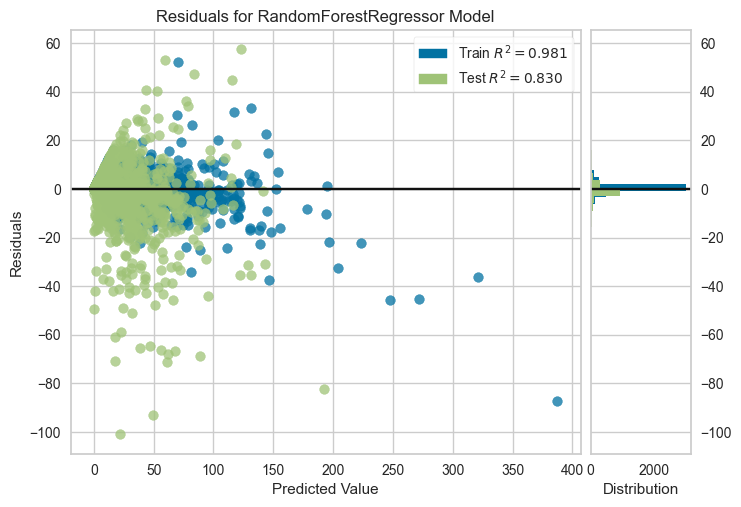

In [15]:
plot_model(tuned_rf_mdl, plot='residuals')